In [2]:
import setup

In [9]:
import iohelper.results as rio
from iohelper import hamiltonians
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

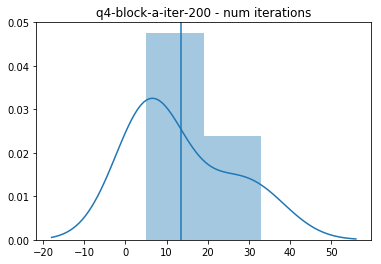

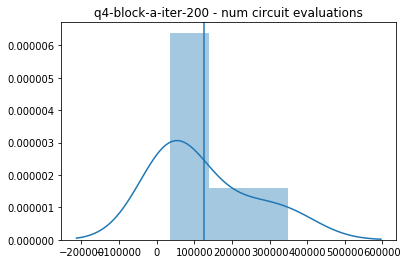

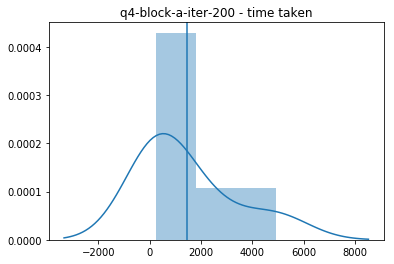

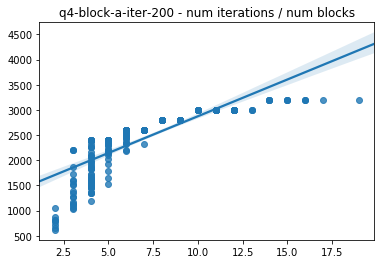

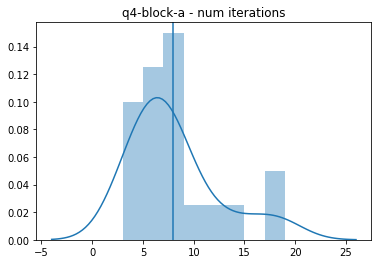

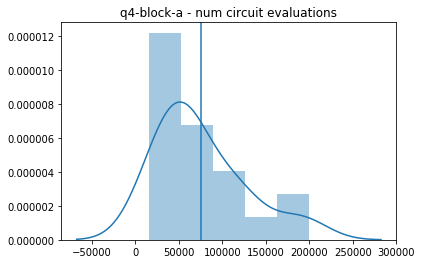

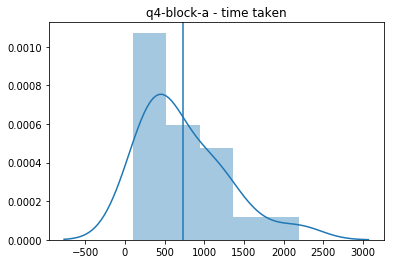

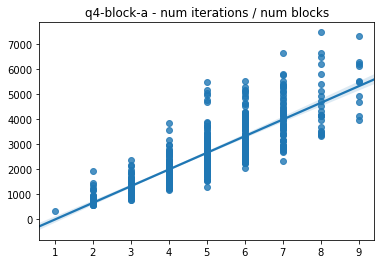

In [5]:
def plot_reports(collection_name):
    reports = list(rio.load_all(collection_name))
    num_iterations = [len(r.iterations) for r in reports]
    num_evaluations = [sum(m.num_circ_evaluations for i in r.iterations for m in i.mutations) for r in reports]
    time_taken = [sum(i.time for i in r.iterations) for r in reports]
    num_evaluations_num_blocks = np.array([[m.num_circ_evaluations, m.circ.size] for r in reports for m in r.all_mutations])

    #best_circuits = [r.best_circuit for r in reports]

    plt.figure()
    plt.title('{} - num iterations'.format(collection_name))
    plt.axvline(np.average(num_iterations))
    sns.distplot(num_iterations)
    
    plt.figure()
    plt.title('{} - num circuit evaluations'.format(collection_name))
    plt.axvline(np.average(num_evaluations))
    sns.distplot(num_evaluations)
    
    plt.figure()
    plt.title('{} - time taken'.format(collection_name))
    plt.axvline(np.average(time_taken))
    sns.distplot(time_taken)
    
    plt.figure()
    plt.title('{} - num iterations / num blocks'.format(collection_name))
    sns.regplot(num_evaluations_num_blocks[:, 1], num_evaluations_num_blocks[:, 0])

plot_reports('q4-block-a-iter-200')
# plot_reports('q4-block-cnot')
plot_reports('q4-block-a')

In [23]:
reports = list(rio.load_all('q4-block-a'))
for r in reports:
    if r.best_circuit.size == 4:
        QCircuitConversions.to_qiskit_circuit(r.best_circuit).draw(output='mpl', filename='l.png', style={'fold': 50})

In [20]:
from circuit import QCircuitConversions

In [28]:
def avgne(collection_name):
    reports = list(rio.load_all(collection_name))
    num_evaluations = [sum(m.num_circ_evaluations for i in r.iterations for m in i.mutations) for r in reports]
    return np.average(num_evaluations)

colls = ['q4-block-a', 'q4-block-b', 'q4-block-cnot']
avgs = [avgne(c) for c in colls]

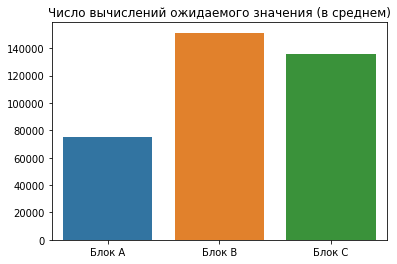

In [36]:
collsn = ['Блок A', 'Блок B', 'Блок C']
plt.title('Число вычислений ожидаемого значения (в среднем)')
sns.barplot(collsn, avgs)

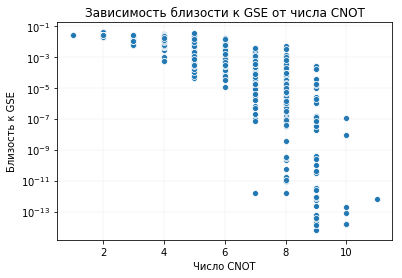

In [35]:
gse = hamiltonians.q4.min_eigenvalue
reports = rio.load('collections', 'LiH-4')
data = np.array([[m.circ.size, m.value - gse] for r in reports for i in r.iterations for m in i.mutations])
# data = np.array([[r.best_circuit.size, r.best_circuit_value - gse] for r in reports])
plt.title('Зависимость близости к GSE от числа CNOT')
plt.xlabel('Число CNOT')
plt.ylabel('Близость к GSE')
plt.semilogy()
plt.grid(True, linestyle='-', linewidth=0.1)
sns.scatterplot(data[:,0], data[:,1])

In [61]:
from kandala_circuit import kandala_circuit
from algo.cvqe_wrapper import CVqe
task = hamiltonians.q8
cvqe = CVqe(task.H, 1e-6)
r2 = [[(task.N - 1) * i, cvqe.optimize(kandala_circuit(task.N, task.classical_psi0, i)).opt_value] for i in range(0, 8) for j in range(0, 5)]

In [44]:
import kandala_circuit
from importlib import reload
reload(kandala_circuit)

<module 'kandala_circuit' from '/home/arthur/qe/src/kandala_circuit.py'>

In [46]:
r = np.array(r)

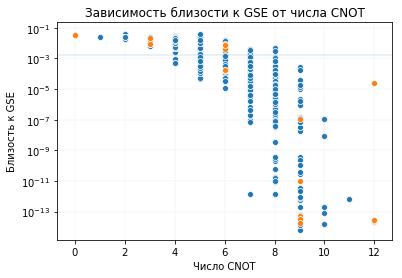

In [65]:
gse = hamiltonians.q4.min_eigenvalue
reports = rio.load('collections', 'LiH-4')
data = np.array([[m.circ.size, m.value - gse] for r in reports for i in r.iterations for m in i.mutations])
plt.title('Зависимость близости к GSE от числа CNOT')
plt.xlabel('Число CNOT')
plt.ylabel('Близость к GSE')
plt.semilogy()
plt.grid(True, linestyle='-', linewidth=0.1)
plt.axhline(0.0016, linewidth=0.2)
sns.scatterplot(data[:,0], data[:,1])
sns.scatterplot(r[:,0], r[:,1] - gse)

In [53]:
print((r[:,1] - gse)<0.0016)

[False False False False False False False False False False  True False
 False  True False  True  True  True  True  True  True  True  True  True
  True]


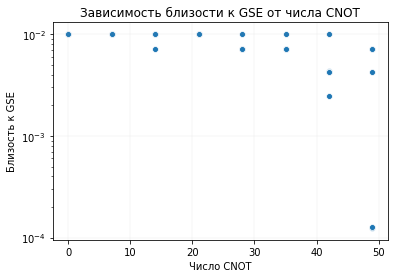

In [62]:
r2 = np.array(r2)
gse = hamiltonians.q8.min_eigenvalue
reports = rio.load('collections', 'LiH-4')
data = np.array([[m.circ.size, m.value - gse] for r in reports for i in r.iterations for m in i.mutations])
plt.title('Зависимость близости к GSE от числа CNOT')
plt.xlabel('Число CNOT')
plt.ylabel('Близость к GSE')
plt.semilogy()
plt.grid(True, linestyle='-', linewidth=0.1)
#sns.scatterplot(data[:,0], data[:,1])
sns.scatterplot(r2[:,0], r2[:,1] - gse)

In [ ]:
1.6 * 10^-3